# Web Scraping

In [2]:
import requests

In [3]:
url='https://www.mohfw.gov.in/'
html=requests.get(url).text

In [4]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(html,'lxml')

In [4]:
soup.title.text

'MoHFW | Home'

In [5]:

data=[]
table=soup.find("div",{'data-table table-responsive'})
tr=soup.find_all('tr')
for td in tr:
    allrows=td.find_all('td')
    datarow=[]
    for row in allrows:
        datarow.append(row.text)
    data.append(datarow)

In [6]:
data

[[],
 ['1', 'Andaman and Nicobar Islands', '33', '33', '0'],
 ['2', 'Andhra Pradesh', '2823', '1856', '56'],
 ['3', 'Arunachal Pradesh', '1', '1', '0'],
 ['4', 'Assam', '378', '55', '4'],
 ['5', 'Bihar', '2587', '702', '13'],
 ['6', 'Chandigarh', '238', '186', '3'],
 ['7', 'Chhattisgarh', '252', '67', '0'],
 ['8', 'Dadar Nagar Haveli', '2', '0', '0'],
 ['9', 'Delhi', '13418', '6540', '261'],
 ['10', 'Goa', '66', '19', '0'],
 ['11', 'Gujarat', '14056', '6412', '858'],
 ['12', 'Haryana', '1184', '765', '16'],
 ['13', 'Himachal Pradesh', '203', '63', '3'],
 ['14', 'Jammu and Kashmir', '1621', '809', '21'],
 ['15', 'Jharkhand', '370', '148', '4'],
 ['16', 'Karnataka', '2089', '654', '42'],
 ['17', 'Kerala', '847', '521', '4'],
 ['18', 'Ladakh', '52', '43', '0'],
 ['19', 'Madhya Pradesh', '6665', '3408', '290'],
 ['20', 'Maharashtra', '50231', '14600', '1635'],
 ['21', 'Manipur', '32', '4', '0'],
 ['22', 'Meghalaya', '14', '12', '1'],
 ['23', 'Mizoram', '1', '1', '0'],
 ['24', 'Odisha', '13

In [43]:
import pandas as pd
df=pd.DataFrame(data)

In [44]:
df.head(20)

,0,1,2,3,4
0,None,None,None,None,None
1,1,Andaman and Nicobar Islands,33,33,0
2,2,Andhra Pradesh,2823,1856,56
3,3,Arunachal Pradesh,1,1,0
4,4,Assam,378,55,4
5,5,Bihar,2587,702,13
6,6,Chandigarh,238,186,3
7,7,Chhattisgarh,252,67,0
8,8,Dadar Nagar Haveli,2,0,0
9,9,Delhi,13418,6540,261


In [45]:
#### to get the headings

In [46]:
headings=soup.find_all('th')
headings

[<th><strong>S. No.</strong></th>,
 <th><strong>Name of State / UT</strong></th>,
 <th><strong>Total Confirmed cases* </strong></th>,
 <th><strong>Cured/Discharged/Migrated</strong></th>,
 <th><strong>Deaths**</strong></th>]

In [47]:
col_list=[]
for cols in headings:
    col_list.append(cols.text)
col_list

['S. No.',
 'Name of State / UT',
 'Total Confirmed cases* ',
 'Cured/Discharged/Migrated',
 'Deaths**']

In [48]:
df.columns=col_list

In [49]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
0,None,None,None,None,None
1,1,Andaman and Nicobar Islands,33,33,0
2,2,Andhra Pradesh,2823,1856,56
3,3,Arunachal Pradesh,1,1,0
4,4,Assam,378,55,4


In [50]:
df=df.drop([0],axis=0)

In [59]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
1,1,Andaman and Nicobar Islands,33,33,0
2,2,Andhra Pradesh,2823,1856,56
3,3,Arunachal Pradesh,1,1,0
4,4,Assam,378,55,4
5,5,Bihar,2587,702,13


ValueError: could not convert string to float: 'Total Confirmed cases*'

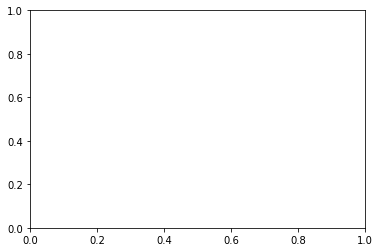

In [65]:
import seaborn as sns
sns.distplot('Total Confirmed cases*')